In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o shapefile de TO 

In [2]:
gdf = gpd.read_file('Shapes/SE/28SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3316 entries, 0 to 3315
Data columns (total 14 columns):
ID            3316 non-null int64
CD_GEOCODI    3316 non-null object
TIPO          3316 non-null object
CD_GEOCODB    943 non-null object
NM_BAIRRO     943 non-null object
CD_GEOCODS    3316 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    3316 non-null object
NM_DISTRIT    3316 non-null object
CD_GEOCODM    3316 non-null object
NM_MUNICIP    3316 non-null object
NM_MICRO      3316 non-null object
NM_MESO       3316 non-null object
geometry      3316 non-null object
dtypes: int64(1), object(13)
memory usage: 362.8+ KB


In [3]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo  para SE

In [4]:
dados = pd.read_csv('Planilhas/SE/CSV/Basico_SE.csv',sep =';')

In [5]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(3297, 13)

In [6]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,280010005000001,263.0,891.0,"3,39","2,93","659,21","1063772,52","713,47","1112817,51","363,13","521304,65","572,66","702504,35"
1,280010005000002,139.0,431.0,"3,1","2,53","784,32","1412478,25","845,12","1471042,89","473,35","790772,39","707,21","1016970,48"
2,280010005000003,139.0,484.0,"3,48","3,14","379,12","134097,97","450,4","127145,95","231,44","124961,91","425,2","147299,26"
3,280010005000004,112.0,377.0,"3,37","3,59","321,94","109096,35",357,"108454,46","210,2","98382,94","343,75","115076,45"
4,280010005000005,20.0,58.0,"2,9","3,57","336,55","89955,52","420,69","76188,36","218,06","69723,3","358,74","64054,26"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [7]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [8]:
se = pd.merge(gdf,dados, on='CD_GEOCODI')

In [9]:
se.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3297 entries, 0 to 3296
Data columns (total 26 columns):
ID            3297 non-null int64
CD_GEOCODI    3297 non-null int64
TIPO          3297 non-null object
CD_GEOCODB    936 non-null object
NM_BAIRRO     936 non-null object
CD_GEOCODS    3297 non-null object
NM_SUBDIST    0 non-null object
CD_GEOCODD    3297 non-null object
NM_DISTRIT    3297 non-null object
CD_GEOCODM    3297 non-null object
NM_MUNICIP    3297 non-null object
NM_MICRO      3297 non-null object
NM_MESO       3297 non-null object
geometry      3297 non-null object
V001          3290 non-null float64
V002          3290 non-null float64
V003          3290 non-null object
V004          3290 non-null object
V005          3290 non-null object
V006          3290 non-null object
V007          3289 non-null object
V008          3289 non-null object
V009          3297 non-null object
V010          3297 non-null object
V011          3293 non-null object
V012          3

In [10]:
del gdf
del dados

Text(0.5,1,'SERGIPE - SE')

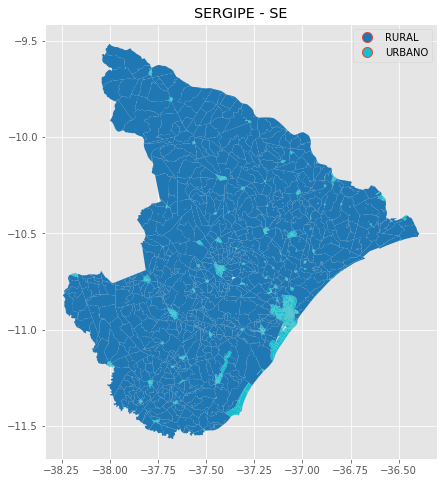

In [32]:
plt.style.use('ggplot')
se.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title('SERGIPE - SE')

# Utilizando a projeção de Albers para calcular as áreas

In [11]:
se['AREA'] = se.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [12]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [13]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [14]:
areas_urbanas_se_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']=='SE']
del areas_urbanas_br_15

In [15]:
areas_urbanas_se_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
136,Brejo Grande,SE,0.569,2800704.0,POLYGON ((-36.46539674097573 -10.4334438688722...,0.568695
137,Campo do Brito,SE,3.086,2801009.0,POLYGON ((-37.4910176459373 -10.74331370543803...,3.085549
138,Canhoba,SE,0.383,2801108.0,POLYGON ((-36.97602546000736 -10.1410285443272...,0.383212
147,Amparo de SÃ£o Francisco,SE,0.352,2800100.0,POLYGON ((-36.92880087082151 -10.1303369531672...,0.351802
148,AquidabÃ£,SE,3.131,2800209.0,POLYGON ((-37.0236406555287 -10.30093146670446...,3.130629


In [16]:
areas_urbanas_se_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_se_15['CD_GEOCODM']=areas_urbanas_se_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_se_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 75 entries, 136 to 221
Data columns (total 6 columns):
Municipio     75 non-null object
UF            75 non-null object
Area_Urb      75 non-null float64
CD_GEOCODM    75 non-null int64
geometry      75 non-null object
Area          75 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.1+ KB


In [17]:
se.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no SC')

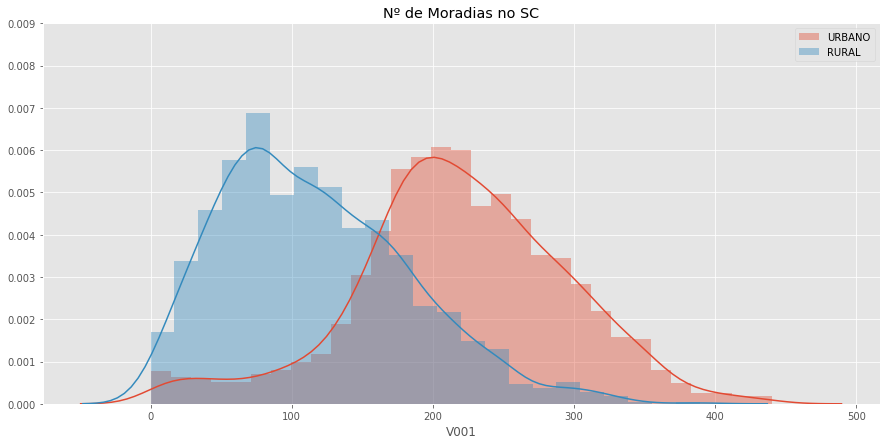

In [18]:
plt.style.use('ggplot')
se['V001'] = pd.to_numeric(se['V001'])
se['V002'] = pd.to_numeric(se['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(se[se['TIPO'] =='URBANO']['V001'])
sns.distplot(se[se['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.009))
plt.title('Nº de Moradias no SC')

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [19]:
print('RURAL','\n',se[se['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',se[se['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    1280.000000
mean      116.809375
std        66.927928
min         0.000000
25%        66.000000
50%       108.500000
75%       161.000000
max       389.000000
Name: V001, dtype: float64
URBANO 
 count    2017.000000
mean      219.037680
std        75.668827
min         0.000000
25%       176.000000
50%       218.000000
75%       268.000000
max       440.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Area no SC- Rural e URBANO Embrapa')

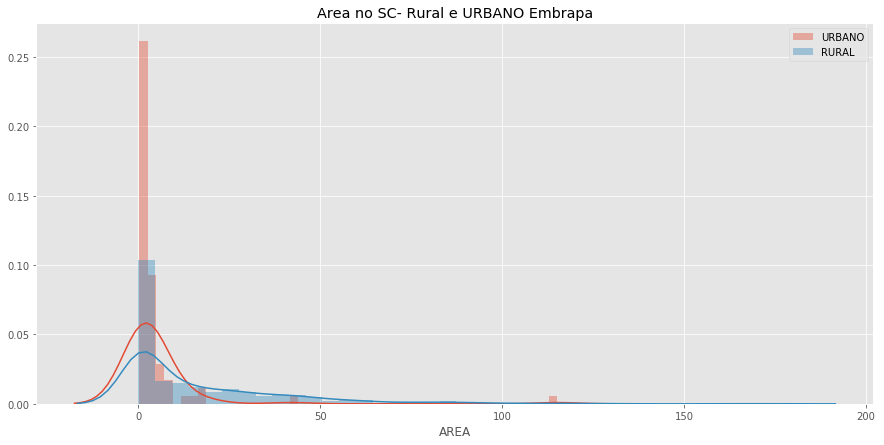

In [20]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_se_15['Area'])
plt.legend(['URBANO'])
sns.distplot(se[se['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no SC- Rural e URBANO Embrapa')

## Descrição da área por setor censitários urbanos e rurais

In [21]:
print('URBANO','\n',areas_urbanas_se_15['Area'].describe())
print('RURAL','\n',se[se['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count     75.000000
mean       5.028359
std       14.163077
min        0.246663
25%        0.778175
50%        1.586300
75%        3.557307
max      115.106489
Name: Area, dtype: float64
RURAL 
 count    1280.000000
mean       16.562936
std        23.387264
min         0.006336
25%         0.241218
50%         6.046231
75%        25.506200
max       174.783347
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.0027)

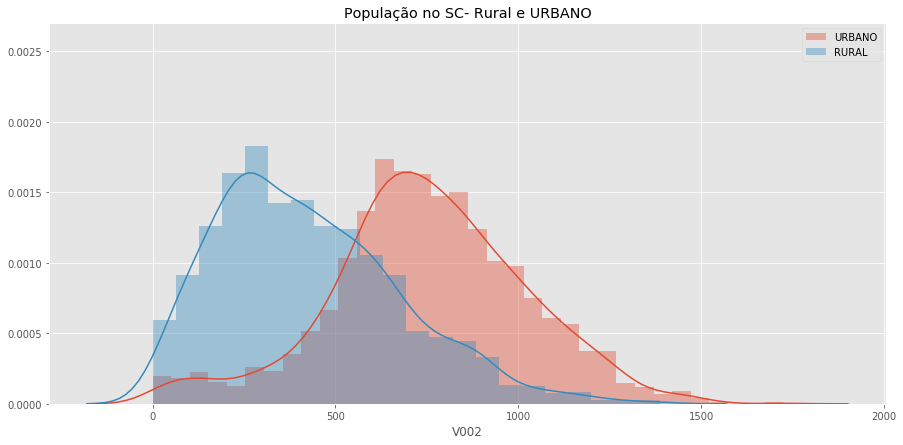

In [22]:
fig = plt.figure(figsize = (15,7))

sns.distplot(se[se['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(se[se['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no SC- Rural e URBANO')
plt.ylim((0,0.0027))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [23]:
print('RURAL','\n',se[se['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',se[se['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    1280.000000
mean      425.152344
std       250.360546
min         0.000000
25%       235.750000
50%       389.000000
75%       579.000000
max      1388.000000
Name: V002, dtype: float64
URBANO 
 count    2017.000000
mean      751.424888
std       269.359026
min         0.000000
25%       596.000000
50%       744.000000
75%       924.000000
max      1725.000000
Name: V002, dtype: float64


In [24]:
se['Densidade Moradias'] = se.V001/se.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

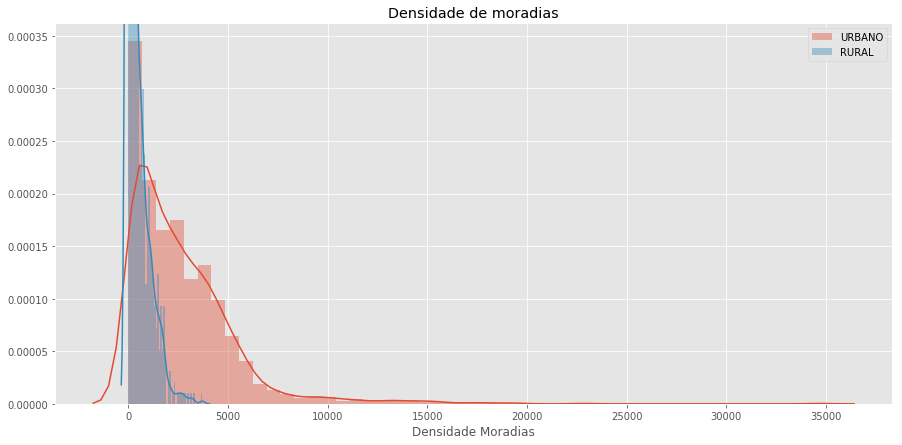

In [25]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(se[se['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(se[se['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')

In [26]:
print('RURAL','\n',se[se['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',se[se['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count    1280.000000
mean      297.126038
std       504.446244
min         0.000000
25%         3.859651
50%        16.847851
75%       414.613707
max      3706.265798
Name: Densidade Moradias, dtype: float64
URBANO 
 count     2017.000000
mean      2656.289788
std       2700.393236
min          0.000000
25%        743.420607
50%       2077.335883
75%       3756.727522
max      34656.948553
Name: Densidade Moradias, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [27]:
max_area = areas_urbanas_se_15['Area'].mean() 
min_pop =  se[se['TIPO']=='URBANO']['V002'].mean()
min_mor =  se[se['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = se[se['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.25)

In [28]:
scrcu = se[(se.TIPO=='RURAL')&(se.V001 >= min_mor)&(se.AREA <= max_area)&(se.V002>= min_pop)&(se['Densidade Moradias']>= min_densidade_moradias)]

In [29]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,26.000000,2.600000e+01,26.000000,26.000000,26.000000,26.000000
mean,58438.307692,2.803773e+14,269.269231,961.923077,0.240939,1223.269146
std,719.127013,1.778829e+11,39.114762,138.585980,0.077291,418.740277
min,57361.000000,2.800704e+14,220.000000,799.000000,0.085692,769.152690
25%,57828.500000,2.802776e+14,244.250000,859.500000,0.184112,963.883826
50%,58342.500000,2.803500e+14,259.000000,923.500000,0.236506,1136.270975
75%,59007.500000,2.805281e+14,289.500000,1045.500000,0.286310,1451.934758
max,59645.000000,2.807105e+14,389.000000,1388.000000,0.392954,2765.719230


Text(0.5,1,'SCRCU - Por Município')

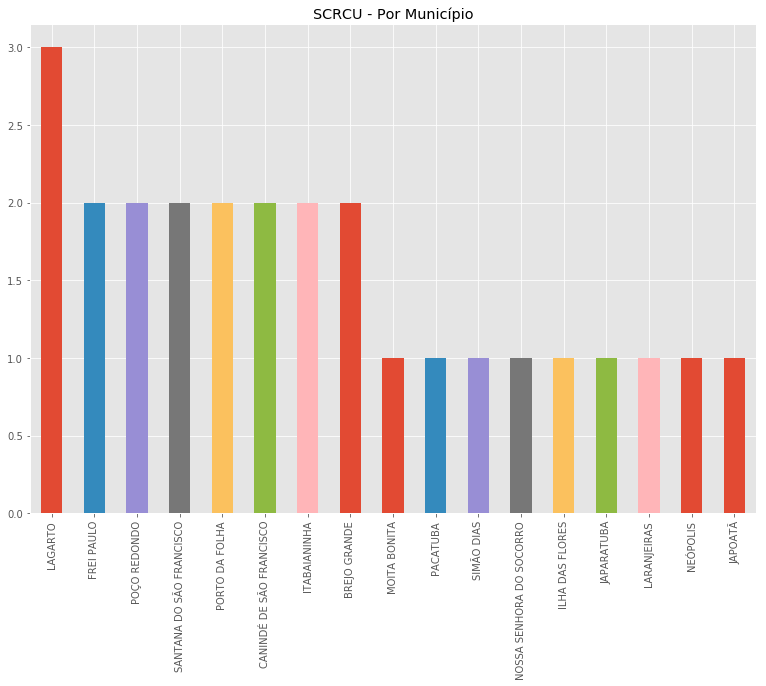

In [30]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado de SE - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


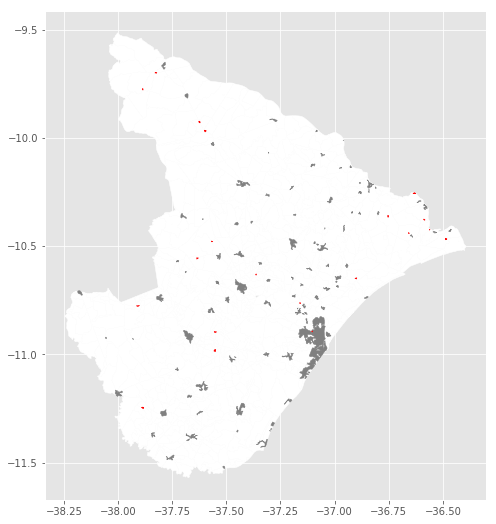

In [31]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
se.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_se_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [32]:
areas_urbanas_se_15.rename(columns={'Area':'AREA'},inplace = True)

In [33]:
fonte = np.zeros(areas_urbanas_se_15.shape[0])
areas_urbanas_se_15['FONTE'] = fonte

In [34]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
regioes_urbanas_se = scrcu[['geometry','FONTE']].append(areas_urbanas_se_15[['geometry','FONTE']])

In [36]:
regioes_urbanas_se.head()

,geometry,FONTE
934,POLYGON ((-36.48807164450631 -10.4637332866983...,1.0
935,"POLYGON ((-36.4887004484115 -10.466255072454, ...",1.0
1003,POLYGON ((-37.82754768928069 -9.69671061833726...,1.0
1006,"POLYGON ((-37.8855464964015 -9.77151771007571,...",1.0
1313,POLYGON ((-37.63674901547643 -10.5537121282589...,1.0


In [37]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_se['FONTE'] = regioes_urbanas_se['FONTE'].apply(fonte) 

In [38]:
regioes_urbanas_se.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_se.shp')

In [39]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_se[regioes_urbanas_se['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='black')
regioes_urbanas_se[regioes_urbanas_se['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='gray')

mplleaflet.display(fig=f,crs=regioes_urbanas_se.crs)